<a href="https://colab.research.google.com/github/PaoChanChan/lenguaje_claro_cyc_2/blob/main/volumetr%C3%ADa/lecturabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cálculo de lecturabilidad de un sitio web

Con este código vamos a bajarnos el texto de un sitio web y a calcular su lecturabilidad de acuerdo con la fórmula de Fernández Huerta.

In [52]:
!pip install textstat

In [53]:
#Importamos las librerías
import requests
from bs4 import BeautifulSoup
import pandas as pd
import textstat

In [54]:
url = 'https://ayuntamientodegines.es/' #indicamos la URL de la que queremos extraer textos

In [55]:
# Función para limpiar el texto
def clean_text(text):
    # Reemplaza saltos de línea y tabulaciones con un espacio
    text = text.replace('\n', ' ').replace('\t', ' ')
    # Elimina múltiples espacios reemplazándolos con un solo espacio
    while '  ' in text:
        text = text.replace('  ', ' ')
    # Elimina espacios al principio y al final del texto
    text = text.strip()
    return text


# Descargar y analizar la página principal
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Extraer todos los enlaces de la página
links = [link.get('href') for link in soup.find_all('a')]

# Descargar y limpiar el texto de los primeros 10 enlaces (o menos si hay menos enlaces)
texts = []
for link in links[:10]:  # Usamos un índice para probar con los 10 primeros enlaces
    if link:
        full_url = url + link if not link.startswith('http') else link
        response = requests.get(full_url)
        soup = BeautifulSoup(response.content, 'html.parser')
        # Extraer todo el texto de la página
        text = soup.get_text()
        # Limpiar el texto
        cleaned_text = clean_text(text)
        texts.append(cleaned_text)

# Crear un DataFrame con los enlaces y los textos limpios
df = pd.DataFrame()
df['links'] = pd.Series(links[:len(texts)])  # Asegurarse de que los enlaces coincidan con la cantidad de textos
df['texts'] = pd.Series(texts)

# Mostrar el DataFrame
print(df)

                                               links  \
0                                           #content   
1      https://www.facebook.com/ayuntamiento.degines   
2                      https://twitter.com/AytoGines   
3  https://www.youtube.com/channel/UCABop55ZqbRQ0...   
4     https://www.instagram.com/ayuntamientodegines/   
5      https://www.facebook.com/ayuntamiento.degines   
6                      https://twitter.com/AytoGines   
7  https://www.youtube.com/channel/UCABop55ZqbRQ0...   
8     https://www.instagram.com/ayuntamientodegines/   
9                                                  /   

                                               texts  
0  Ayuntamiento de Gines \r Ir al contenido Tel :...  
1                              Ayuntamiento de Gines  
2                                              x.com  
3  Gines Televisión - YouTubeOverPersAuteursrecht...  
4                                                     
5                              Ayuntamiento de Gines 

In [56]:
df.dropna() #eliminamos filas vacías

,links,texts
0,#content,Ayuntamiento de Gines \r Ir al contenido Tel :...
1,https://www.facebook.com/ayuntamiento.degines,Ayuntamiento de Gines
2,https://twitter.com/AytoGines,x.com
3,https://www.youtube.com/channel/UCABop55ZqbRQ0...,Gines Televisión - YouTubeOverPersAuteursrecht...
4,https://www.instagram.com/ayuntamientodegines/,
5,https://www.facebook.com/ayuntamiento.degines,Ayuntamiento de Gines
6,https://twitter.com/AytoGines,x.com
7,https://www.youtube.com/channel/UCABop55ZqbRQ0...,Gines Televisión - YouTubeOverPersAuteursrecht...
8,https://www.instagram.com/ayuntamientodegines/,
9,/,Ayuntamiento de Gines \r Ir al contenido Tel :...


In [57]:
#Calculamos número de oraciones por página y lecturabilidad
df['num oraciones'] = df['texts'].astype(str).apply(lambda x: textstat.sentence_count(x) if x else 0)
df['num palabras'] = df['texts'].astype(str).apply(lambda x: textstat.lexicon_count(x, removepunct=True) if x else 0)
df['palabras/oración'] = df['num palabras'].divide(df['num oraciones'])
df['fdz huerta'] = df['texts'].astype(str).apply(lambda x: textstat.fernandez_huerta(x) if x else 0)
df['tiempo lectura'] = df['texts'].astype(str).apply(lambda x: textstat.reading_time(x, ms_per_char=14.69) if x else 0)
df.head()


,links,texts,num oraciones,num palabras,palabras/oración,fdz huerta,tiempo lectura
0,#content,Ayuntamiento de Gines \r Ir al contenido Tel :...,51,2788,54.666667,49.1,225.58
1,https://www.facebook.com/ayuntamiento.degines,Ayuntamiento de Gines,1,3,3.000000,101.8,0.28
2,https://twitter.com/AytoGines,x.com,1,1,1.000000,145.8,0.07
3,https://www.youtube.com/channel/UCABop55ZqbRQ0...,Gines Televisión - YouTubeOverPersAuteursrecht...,1,17,17.000000,45.5,2.82
4,https://www.instagram.com/ayuntamientodegines/,,0,0,NaN,0.0,0.00


<Axes: >

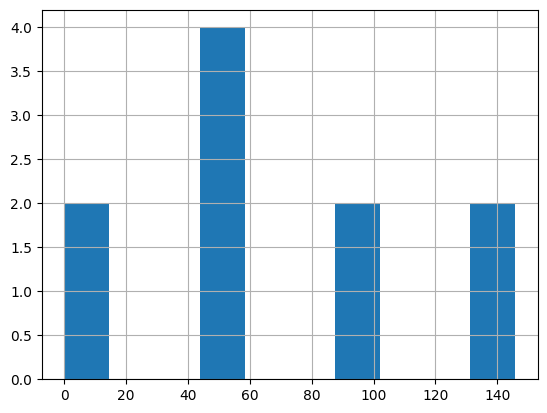

In [58]:
df['fdz huerta'].hist()

In [59]:
#Guardamos la tabla en un fichero csv
df.to_csv("aytogines")

In [60]:
print ('media de oraciones por archivo:')
print (round (df['num oraciones'].mean(),0))
print ('media de nivel de lectura:')
print(round(df['fdz huerta'].mean(), 0))
print ('media de tiempo de lectura (segundos):')
print(round(df['tiempo lectura'].mean(), 0))



media de oraciones por archivo:
11.0
media de nivel de lectura:
68.0
media de tiempo de lectura (segundos):
46.0


<Axes: >

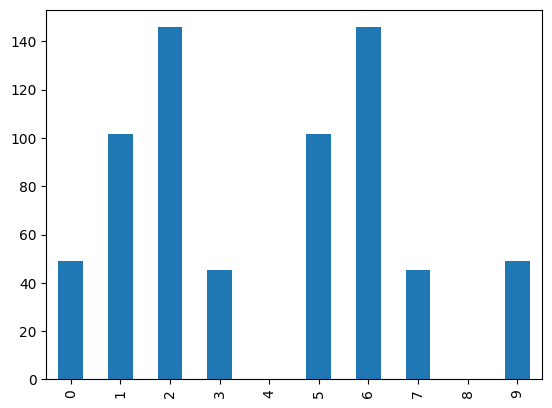

In [61]:
df['fdz huerta'].plot.bar()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a2326c74-8155-424a-a9ea-889ef1bb8e18' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>